# Kaggle Machine Learning Competition: Titanic Survivors Dataset

This dataset comes from Kaggle.com. The dataset includes the info of passengers on the Titanic ship. My question is: I would like use this dataset to find out what factors made people more likely to survive and how can I predict who survived by generating models. Here is the index of this ipython notebook.

1. Description and competition evaluation
2. Data set
3. Explore the data
4. Cleaning the data
5. Random Forest and Logistic Regression
6. Summary and moving forward

### Description and competition evaluation

The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

Resource: https://www.kaggle.com/c/titanic

### Data set

VARIABLE DESCRIPTIONS:
survival        Survival
                (0 = No; 1 = Yes)
pclass          Passenger Class
                (1 = 1st; 2 = 2nd; 3 = 3rd)
name            Name
sex             Sex
age             Age
sibsp           Number of Siblings/Spouses Aboard
parch           Number of Parents/Children Aboard
ticket          Ticket Number
fare            Passenger Fare
cabin           Cabin
embarked        Port of Embarkation
                (C = Cherbourg; Q = Queenstown; S = Southampton)

SPECIAL NOTES:
Pclass is a proxy for socio-economic status (SES)
 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower

Age is in Years; Fractional if Age less than One (1)
 If the Age is Estimated, it is in the form xx.5

With respect to the family relation variables (i.e. sibsp and parch)
some relations were ignored.  The following are the definitions used
for sibsp and parch.

Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
Parent:   Mother or Father of Passenger Aboard Titanic
Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic

Other family relatives excluded from this study include cousins,
nephews/nieces, aunts/uncles, and in-laws.  Some children travelled
only with a nanny, therefore parch=0 for them.  As well, some
travelled with very close friends or neighbors in a village, however,
the definitions do not support such relations.

Resource: https://www.kaggle.com/c/titanic/data

### Explore the data

In [82]:
import pandas as pd
import numpy as np

train = pd.read_csv('train.csv', header=0)
test = pd.read_csv('test.csv', header=0)#import data with header

In [83]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


From info we notice that we missed value in column Age, Cabin and Embarked. We have 891 records and 12 columns in total.

In [84]:
train.describe()
#Let's see some statistics of our data.

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From describe, we found that average survival rate is 38.4%. Average age is 29.7 years old. Average siblings/spouses and parents/children abroad is 0.52 and 0.38. Average fare is 32.2, but the range of fares is very large. Let's visualize these columns.

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


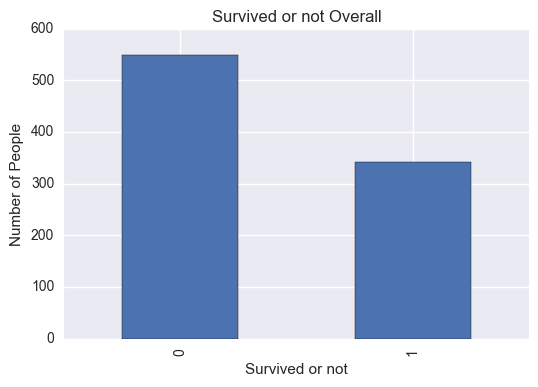

In [87]:
train['Survived'].value_counts().plot(kind='bar')
plt.title('Survived or not Overall')
plt.xlabel('Survived or not')
plt.ylabel('Number of People')
#Let's see how many people truly survived from this dataset.


In this graph, you can see there are less people survived. So if we don't know anything about this dataset, we can easily guess that the possibility of a person to be survived from Titantic ship is less than 50%.

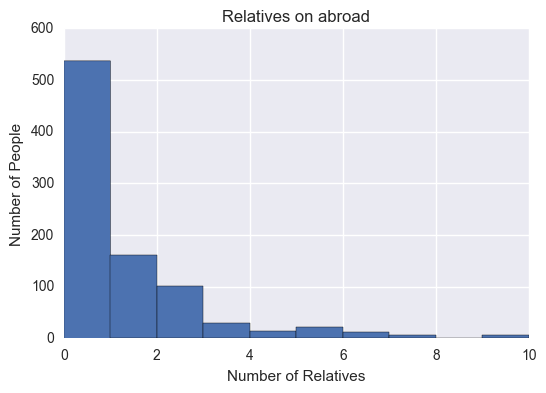

In [89]:
train['Relatives']= train['SibSp']+train['Parch']#Combine SibSp and Parch since they are both relatives of passengers.
train['Relatives'].hist()
plt.title('Relatives on abroad')
plt.xlabel('Number of Relatives')
plt.ylabel('Number of People')


I combine SibSp and Parch since they are both relatives of passengers. This graph shows the distribution of relatives of all the people on this ship. Majority of them do not have relatives abroad, the distribution is positively skewed.

In [90]:
test['Relatives']= test['SibSp']+test['Parch']

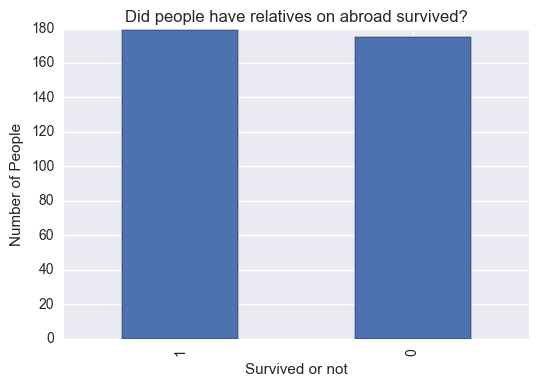

In [91]:
has_relative=train.Survived[train.Relatives>0].value_counts().plot(kind='bar')
plt.title('Did people have relatives on abroad survived?')
plt.xlabel('Survived or not')
plt.ylabel('Number of People')


We can see in this graph, people have relatives on abroad still had about 50% chance to survive, which is higher than the overall survive rate.

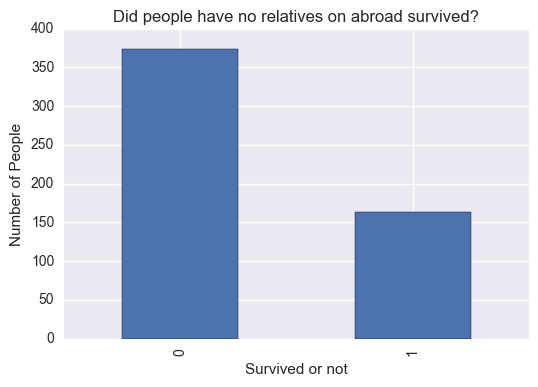

In [92]:
no_relative=train.Survived[train.Relatives==0].value_counts().plot(kind='bar')
plt.title('Did people have no relatives on abroad survived?')
plt.xlabel('Survived or not')
plt.ylabel('Number of People')


In this graph, we find an interesting thing. That is if people didn't have relatives on abroad, they are less likely to survive.

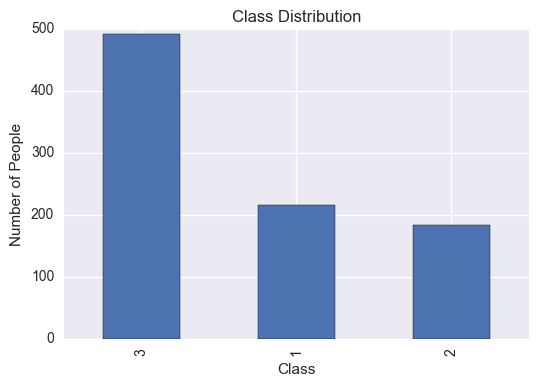

In [149]:
train.Pclass.value_counts().plot(kind='bar')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Number of People')


Based on this plot, almost half of them are Class 3 which means lower class.

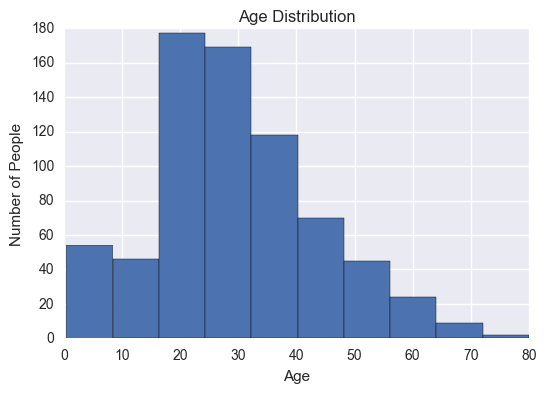

In [94]:
train['Age'].hist()
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Number of People')


This hist shows the majority of passengers are 20-40 years old. And Age distribution is positively skewed.

In [95]:
train['Gender'] = train['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
test['Gender'] = test['Sex'].map( {'female': 0, 'male': 1} ).astype(int)
#Convert female to 0 and male to 1.

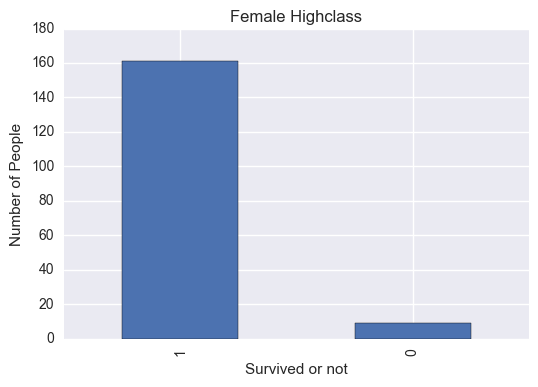

In [96]:

female_highclass = train.Survived[train.Gender == 0][train.Pclass !=3].value_counts().plot(kind='bar')
plt.title('Female Highclass')
plt.xlabel('Survived or not')
plt.ylabel('Number of People')


So how the gender, class impact on the survival rate? Let's look closer. Here in the above plot of "Female High class", High class means not in the class 3. We can see that female in highclass are much more likely to survive.

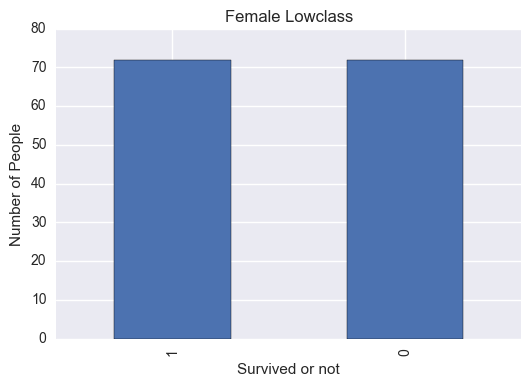

In [97]:
female_lowclass = train.Survived[train.Gender == 0][train.Pclass ==3].value_counts().plot(kind='bar')
plt.title('Female Lowclass')
plt.xlabel('Survived or not')
plt.ylabel('Number of People')


We can see that female in lowclass have about 50% chance to survive.

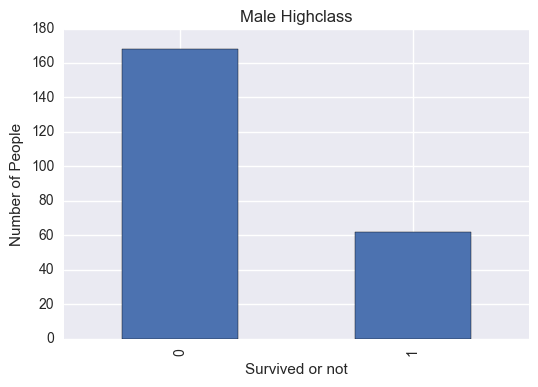

In [98]:
male_highclass = train.Survived[train.Gender == 1][train.Pclass !=3].value_counts().plot(kind='bar')
plt.title('Male Highclass')
plt.xlabel('Survived or not')
plt.ylabel('Number of People')


We can see that male in highclass are less likely to survive, quite opposite to female in highclass.

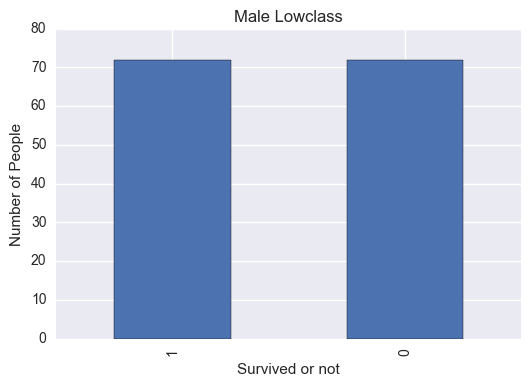

In [99]:
male_lowclass = train.Survived[train.Gender == 0][train.Pclass ==3].value_counts().plot(kind='bar')
plt.title('Male Lowclass')
plt.xlabel('Survived or not')
plt.ylabel('Number of People')


We can see that male in lowclass have about 50% chance to survive, just like female in lowclass.

So in summary, in these four graphs that the female in high class has extremely high survival rate than low class. However, male in high class are much less likely to survive. That's very interesting.

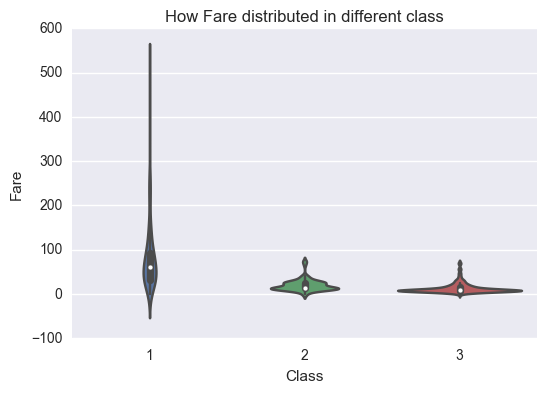

In [156]:
import seaborn
str(train.Pclass)
seaborn.violinplot(train['Pclass'],train['Fare'])
plt.title('How Fare distributed in different class')
plt.xlabel('Class')
plt.ylabel('Fare')
#show how the fare distribued to three classes.


We can see even within one class, the fare is varying from one to one. So I might need both variables to create the model. Also, we can see that varity of fare is much larger in Class 1 than class 2 and 3. 

### Cleaning the data

Now, I'm going to set up my training set. I'm not using Name, passengerId, Ticket and Cabin info. (We miss too much Cabin info. And the ticket really has no meaning.)

In [117]:
train1=pd.DataFrame(train[['Survived','Pclass','Gender','Age','Relatives','Fare','Embarked']])
test1=pd.DataFrame(test[['Pclass','Gender','Age','Relatives','Fare','Embarked']])

In [118]:
train1.info()
# Let's see what kind of data we are missing now.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
Survived     891 non-null int64
Pclass       891 non-null int64
Gender       891 non-null int32
Age          714 non-null float64
Relatives    891 non-null int64
Fare         891 non-null float64
Embarked     889 non-null object
dtypes: float64(2), int32(1), int64(3), object(1)
memory usage: 45.3+ KB


In [119]:
test1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 6 columns):
Pclass       418 non-null int64
Gender       418 non-null int32
Age          332 non-null float64
Relatives    418 non-null int64
Fare         417 non-null float64
Embarked     418 non-null object
dtypes: float64(2), int32(1), int64(2), object(1)
memory usage: 18.0+ KB


In [125]:
#since we missed 2 records of Embarked, and it is hard to give an estimate. I'm going to drop these 2 rows.
train2=pd.DataFrame(train1[pd.notnull(train1['Embarked'])])


In [133]:
train2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to Agefill
Data columns (total 8 columns):
Survived     889 non-null float64
Pclass       889 non-null float64
Gender       889 non-null float64
Age          712 non-null float64
Relatives    889 non-null float64
Fare         889 non-null float64
Embarked     889 non-null object
Agefill      177 non-null float64
dtypes: float64(7), object(1)
memory usage: 62.6+ KB


Now, we still have missing ages. I'm going to use median instead of mean age of each (gender,class) combination to make up the missing values because the distribution of ages is not normal.// I don't want to just delete this missing value records, they are all meaningful based on other columns. By using median ages, the result might be not that accurate because we mights just give a lower age to someone supposed to be higher. I'm awaring of this part.


In [126]:
train2.loc['Agefill']=train2['Age']#create a new column to store filled ages

In [124]:
test1.loc['Agefill']=test1['Age']

In [127]:
#create array to store all the median ages for each class and gender.
median_ages = np.zeros((2,3))
for i in range(0, 2):
    for j in range(0, 3):
        median_ages[i,j] = train2[(train2['Gender'] == i) & \
                              (train2['Pclass'] == j+1)]['Age'].dropna().median()
median_ages

array([[ 35. ,  28. ,  21.5],
       [ 40. ,  30. ,  25. ]])

In [128]:
#fill the missing values with median ages
for i in range(0, 2):
    for j in range(0, 3):
        train2.loc[ (train2.Age.isnull()) & (train2.Gender == i) & (train2.Pclass == j+1),\
                'Agefill'] = median_ages[i,j]

In [129]:
for i in range(0, 2):
    for j in range(0, 3):
        test1.loc[ (test1.Age.isnull()) & (test1.Gender == i) & (test1.Pclass == j+1),\
                'Agefill'] = median_ages[i,j]#using training data to fill test ages

In [130]:
#double check if age got filled
train2[train2['Age'].isnull() ][['Gender','Pclass','Age','Agefill']].head(10)

,Gender,Pclass,Age,Agefill
5,1.0,3.0,NaN,25.0
17,1.0,2.0,NaN,30.0
19,0.0,3.0,NaN,21.5
26,1.0,3.0,NaN,25.0
28,0.0,3.0,NaN,21.5
29,1.0,3.0,NaN,25.0
31,0.0,1.0,NaN,35.0
32,0.0,3.0,NaN,21.5
36,1.0,3.0,NaN,25.0
42,1.0,3.0,NaN,25.0


In [136]:
train2['Embarked1'] = train2['Embarked'].map( {'S': 0, 'C': 1,'Q':2} )

In [138]:
test1['Embarked1'] = test1['Embarked'].map( {'S': 0, 'C': 1,'Q':2} )

In [139]:
train2['Embarked1']

0          0.0
1          1.0
2          0.0
3          0.0
4          0.0
5          2.0
6          0.0
7          0.0
8          0.0
9          1.0
10         0.0
11         0.0
12         0.0
13         0.0
14         0.0
15         0.0
16         2.0
17         0.0
18         0.0
19         1.0
20         0.0
21         0.0
22         2.0
23         0.0
24         0.0
25         0.0
26         1.0
27         0.0
28         2.0
29         0.0
          ... 
862        0.0
863        0.0
864        0.0
865        0.0
866        1.0
867        0.0
868        0.0
869        0.0
870        0.0
871        0.0
872        0.0
873        0.0
874        1.0
875        1.0
876        0.0
877        0.0
878        0.0
879        1.0
880        0.0
881        0.0
882        0.0
883        0.0
884        0.0
885        2.0
886        0.0
887        0.0
888        0.0
889        1.0
890        2.0
Agefill    NaN
Name: Embarked1, dtype: float64

In [140]:
train3=train2.drop(['Age','Embarked'],axis=1)#drop Age, Embarked column

In [141]:
test2=test1.drop(['Age','Embarked'],axis=1)

In [142]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 890 entries, 0 to Agefill
Data columns (total 7 columns):
Survived     889 non-null float64
Pclass       889 non-null float64
Gender       889 non-null float64
Relatives    889 non-null float64
Fare         889 non-null float64
Agefill      177 non-null float64
Embarked1    889 non-null float64
dtypes: float64(7)
memory usage: 55.6+ KB


In [143]:
#fill missing fare
median_fare = np.zeros(3)
for f in range(0,3):                                              # loop 0 to 2
    median_fare[f] = test2[ test2.Pclass == f+1 ]['Fare'].dropna().median()
for f in range(0,3):                                              # loop 0 to 2
    test2.loc[ (test2.Fare.isnull()) & (test2.Pclass == f+1 ), 'Fare'] = median_fare[f]

In [144]:
test2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 419 entries, 0 to Agefill
Data columns (total 6 columns):
Pclass       418 non-null float64
Gender       418 non-null float64
Relatives    418 non-null float64
Fare         418 non-null float64
Agefill      86 non-null float64
Embarked1    418 non-null float64
dtypes: float64(6)
memory usage: 22.9+ KB


In [145]:
ids = test['PassengerId'].values

### Random Forest and Logistic Regression

After cleaning the data, I'm going to use two classification models to predict - Random forest and logistic regression.

In [39]:
from sklearn.ensemble import RandomForestClassifier


In [40]:
#convert to a numpy array
train_data = train3.values
test_data = test2.values

In [41]:
forest = RandomForestClassifier(n_estimators=100)
forest = forest.fit( train_data[0::,1::], train_data[0::,0] )
output = forest.predict(test_data).astype(int)

In [42]:
import csv as csv
predictions_file = open("randomforest.csv", "wb")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["PassengerId","Survived"])
open_file_object.writerows(zip(ids, output))
predictions_file.close()

I submitted this test result of randomforest and got accuracy of 0.76077 on Kaggle.com.

In [69]:
importances_f = forest.feature_importances_
print importances_f

[ 0.08123912  0.26965288  0.07952988  0.27790211  0.26099909  0.03067691]


In [68]:
train3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
Survived     889 non-null int64
Pclass       889 non-null int64
Gender       889 non-null int32
Relatives    889 non-null int64
Fare         889 non-null float64
Agefill      889 non-null float64
Embarked1    889 non-null int32
dtypes: float64(2), int32(2), int64(3)
memory usage: 48.6 KB


From the feature importance of random forest, Gender, Fare and Age are most importantly among 6 features.

In [43]:
from sklearn.linear_model import LogisticRegression

In [45]:
logistic=LogisticRegression()
logistic = logistic.fit( train_data[0::,1::], train_data[0::,0] )
output = logistic.predict(test_data).astype(int)

In [46]:
import csv as csv
predictions_file = open("logisticregression.csv", "wb")
open_file_object = csv.writer(predictions_file)
open_file_object.writerow(["PassengerId","Survived"])
open_file_object.writerows(zip(ids, output))
predictions_file.close()

I submitted this test result of logistic regression and got accuracy of 0.75598 on Kaggle.com.

In [71]:
importances_l = logistic.coef_
print importances_l

[[-0.91277178 -2.45796761 -0.19736202  0.00450937 -0.0304746   0.21494123]]


From the coefficients of logistic regression, Gender and Pclass are most importantly among 6 features.

Let's do 10-fold cross-validation to see the model accurancy on training dataset for both models.

In [48]:
from sklearn.cross_validation import cross_val_score

C:\Users\Ruofei\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [49]:
scores_l = cross_val_score(LogisticRegression(), train_data[0::,1::], train_data[0::,0], scoring='accuracy', cv=10)
print scores_l

[ 0.7752809   0.78651685  0.76404494  0.87640449  0.83146067  0.7752809
  0.79775281  0.78651685  0.84269663  0.80681818]


In [51]:
scores_r = cross_val_score(RandomForestClassifier(), train_data[0::,1::], train_data[0::,0], scoring='accuracy', cv=10)
print scores_r

[ 0.74157303  0.78651685  0.74157303  0.80898876  0.85393258  0.82022472
  0.84269663  0.76404494  0.84269663  0.84090909]


Looks like both models are not that stable. The logistic regression (accurancy ranges from 0.76 to 0.87) is slightly better than random forest (accurancy ranges from 0.74 to 0.84).

### Summary and moving forward

Based on all the findings above, my results have two part: descriptive analysis and preditive analysis.


For descriptive analysis, I draw bunch of pictures to show the relationship between survive and different kinds of features. I found that majority of people did not have relatives abroad, the distribution is positively skewed. But the survival rate are almost the same no matter you have relatives abroad or not. Secondly, we can see in these four graphs that the female in high class has extremely high survival rate than low class. However, male in high class are much less likely to survive. Thirdly, even within one class, the fare is varying from one to one. Those are all the interesting findings and the fundation for me to do the feature engineering.

For preditive analysis, first, I cleaned the data. I combined "SibSp" and "Parch" to "Relatives". I change "Sex" to 0 ro 1. I fill in the missing values of ages by using the median ages based on gender and class. I change "Embarked" to 0,1 or 2. After the feature engineering, I have used random forest and logistic regression models to predict test file.I found out that gender is the most important factor (based on random forest and logistic regression models) made people on Titanic ship more likely to survive. 

The limitation of my analysis: First, I did some feature engineering like fill the missing value of age and combine relatives together. All these may lose some info or have bias on the real data. Secondly, I ignore some NAs in the dataset, which also lose a lot of information. Besides those, the dataset ifself has some limitations. First of all, we missed bunch of ticket number info. Second, we don't know how the original data collected. Also, we don't know how they divided the Pclass into 3 levels. All these things will result in a bias analysis and model. 

Moving forward, we still could do something to make the predicition more accurate. First, we could try different kind of classification models such as SVM. 

Second, when cleaning and filling the missing data, we could use other methods. For example, I could simply delete those missing ages instead of filling the missing data. Maybe in that case, I could get more accurate models. Also, for the fare, we could create groups to indicate the "rich" and "not that rich" person, this can be another meaningful feature.

Third, we could group people by fare and age and building new features. Finally, we could add feature selection process before creating the model to make it more accurate.

In [72]:
#Let's try out the feature selection in Sklearn.
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=5)
selector.fit(train_data[0::,1::], train_data[0::,0])

SelectKBest(k=5, score_func=<function f_classif at 0x000000000DD6CF28>)

In [74]:
scores = -np.log10(selector.pvalues_)
print scores

[ 24.10919258  68.17509274   0.23189845  13.9666612    1.26053655
   2.930346  ]


From the feature selection we could see that Pclass, Gender and Fare are more important than others, and relatives are very useless here. So next time, maybe we will find another way to use feature "SibSp" and "Parch". Also, "Agefill" and "Embarked" do not have high score, we may consider how to improve our feature engineering process for those features.